In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score ,accuracy_score,precision_score
RANDOM_SEED=2021#no to generation
TEST_PCT=0.3#to represent the percentage of data allocated for testing 
LABELS=['Normal','Fraud']

In [4]:
dataset = pd.read_csv(r"creditcard.csv")
print(list(dataset.columns))
dataset.describe()
.

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#check for null values
print("Any nulls in the dataset ",dataset.isnull().values.any())
print('------')
print('No of unique labels', len(dataset['Class'].unique()))
#0 is for normal credit card transaction
#1 is for fraudulent credit card transaction
print('-------')
print('break down of the normal and fraud transaction')
print(pd.value_counts(dataset['Class'],sort = True))


Any nulls in the dataset  False
------
No of unique labels 2
-------
break down of the normal and fraud transaction
Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3152\636106761.py:9: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(dataset['Class'],sort = True))


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3152\3172665045.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes= pd.value_counts(dataset['Class'],sort=True)


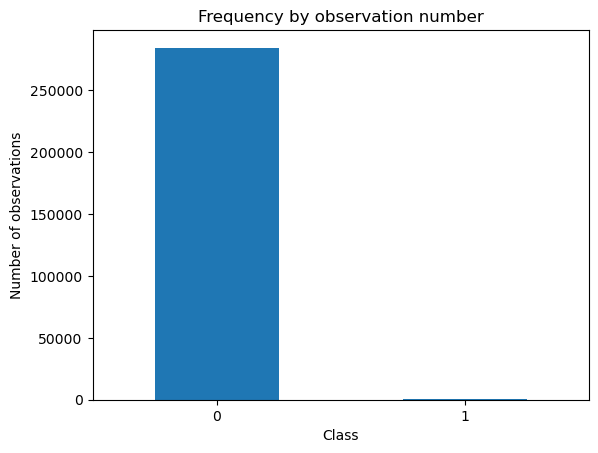

In [6]:
#visualizing the imbalanced dataset
count_classes= pd.value_counts(dataset['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.xticks(range(len(dataset['Class'].unique())),dataset.Class.unique())
plt.title('Frequency by observation number')
plt.xlabel('Class')
plt.ylabel('Number of observations')

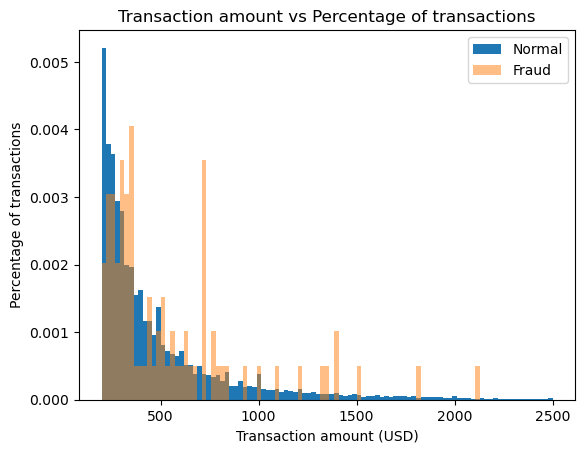

In [7]:
# Save the normal and fradulent transactions in separate dataframe
normal_dataset = dataset[dataset.Class == 0] 
fraud_dataset = dataset[dataset.Class == 1]
#Visualize transactionamounts for normal and fraudulent transactions
bins = np.linspace(200, 2500, 100)
plt.hist(normal_dataset.Amount, bins=bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_dataset.Amount, bins=bins, alpha=0.5, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions");
plt.show()

In [10]:
'''Time and Amount are the columns that are not scaled, so applying StandardScaler to only Amount and Time columns. 
Normalizing the values between 0 and 1 did not work great for the dataset.'''

'Time and Amount are the columns that are not scaled, so applying StandardScaler to only Amount and Time columns. \nNormalizing the values between 0 and 1 did not work great for the dataset.'

In [11]:
sc=StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))

In [12]:
'''The last column in the dataset is our target variable.'''

raw_data = dataset.valuesn#convert numpy array
# The last element contains if the transaction is normal which is represented by a 0 and if fraud then 1
labels = raw_data[:, -1]   # last target column
# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]   #except last all columns for input
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=2021
)

In [13]:
'''Normalize the data to have a value between 0 and 1'''
#min-max scaling

min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
train_data = (train_data - min_val) / (max_val - min_val)  #min-max
test_data = (test_data - min_val) / (max_val - min_val)
train_data = tf.cast(train_data, tf.float32)  #convert to float-32 which is commonly used in tensorflow
test_data = tf.cast(test_data, tf.float32)

In [14]:
'''Use only normal transactions to train the Autoencoder.

Normal data has a value of 0 in the target variable. Using the target variable to create a normal and fraud dataset.'''

train_labels = train_labels.astype(bool)   #convert labels to bool #bool indexing for seprate normal and fraud
test_labels = test_labels.astype(bool)

#creating normal and fraud datasets

normal_train_data = train_data[~train_labels]  #select labels where bool=false
normal_test_data = test_data[~test_labels]
fraud_train_data = train_data[train_labels]   #select labels where bool =true
fraud_test_data = test_data[test_labels]
print(" No. of records in Fraud Train Data=",len(fraud_train_data))
print(" No. of records in Normal Train data=",len(normal_train_data))
print(" No. of records in Fraud Test Data=",len(fraud_test_data))
print(" No. of records in Normal Test data=",len(normal_test_data))

 No. of records in Fraud Train Data= 389
 No. of records in Normal Train data= 227456
 No. of records in Fraud Test Data= 103
 No. of records in Normal Test data= 56859


In [15]:
nb_epoch = 50 #no of epochs(means entire dataset goes 50 times in training)
batch_size = 64  #each iteration
input_dim = normal_train_data.shape[1] #num of columns, 30
encoding_dim = 14   #size of encoder representation
hidden_dim_1 = int(encoding_dim / 2) #
hidden_dim_2=4  
learning_rate = 1e-7  #(0.0001)The learning rate used in the optimization algorithm during training. A lower learning rate can lead to slower convergence but more accurate results in some cases. 

In [16]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))

#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",                                
                        activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)#ayer compresses the input data into an encoded representation (encoding_dim).
encoder=tf.keras.layers.Dropout(0.2)(encoder)   #layer to prevent overfitting by randomly setting 20% of the input units to 0 at each update during training.
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)  #further reduce dimentionality

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)#layers reconstruct the encoded representation back to the original dimension (input_dim), mirroring the structure of the encoder.
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0   

In [17]:
"""Define the callbacks for checkpoints and early stopping"""

cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               mode='min', monitor='val_loss', verbose=2, save_best_only=True)# This callback saves the model's weights during training based on specified conditions.
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,#minimum change in monitor quantity
    patience=10,#no of epochs with no improvements after traininng
    verbose=1, #more detailed output when training stop before early stopping
    mode='min',#minimum validationloss so monitor mode
    restore_best_weights=True) # restore weight with the best value of the monitored quantity 

In [18]:
#Compile the Autoencoder
# function configures the model for training.
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [19]:
#Train the Autoencoder
#method trains the Autoencoder model using the provided training data 
#model is trained to reconstruct normal transactions, so the input and target are the same
history = autoencoder.fit(normal_train_data, normal_train_data,# first argument represents the input data, and the second argument represents the target data.
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_data, test_data),
                    verbose=1,
                    callbacks=[cp, early_stop]#which save the best model based on validation loss and perform early stopping to prevent overfitting.
                    ).history
#: Provides validation data during training, using the test data for validation.
#It evaluates the model performance on unseen data, which helps monitor overfitting.

Epoch 1/50

3539/3554 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.0568
Epoch 1: val_loss improved from inf to 0.00002, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 10s 3ms/step - loss: 0.0056 - accuracy: 0.0567 - val_loss: 1.9982e-05 - val_accuracy: 0.0051
Epoch 2/50
  58/3554 [..............................] - ETA: 6s - loss: 1.8842e-05 - accuracy: 0.0735

C:\Users\Lenovo\Downloads\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3544/3554 [============================>.] - ETA: 0s - loss: 1.9359e-05 - accuracy: 0.0744
Epoch 2: val_loss improved from 0.00002 to 0.00002, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 9s 2ms/step - loss: 1.9357e-05 - accuracy: 0.0743 - val_loss: 1.9971e-05 - val_accuracy: 0.1279
Epoch 3/50
3528/3554 [============================>.] - ETA: 0s - loss: 1.9515e-05 - accuracy: 0.0609
Epoch 3: val_loss did not improve from 0.00002
3554/3554 [==============================] - 8s 2ms/step - loss: 1.9508e-05 - accuracy: 0.0609 - val_loss: 2.0113e-05 - val_accuracy: 0.0556
Epoch 4/50
3554/3554 [==============================] - ETA: 0s - loss: 1.9661e-05 - accuracy: 0.0588
Epoch 4: val_loss did not improve from 0.00002
3554/3554 [==============================] - 9s 2ms/step - loss: 1.9661e-05 - accuracy: 0.0588 - val_loss: 2.0455e-05 - val_accuracy: 0.0010
Epoch 5/50
3552/3554 [============================>.] - ETA: 0s - loss: 1.9620e-05 - accuracy: 0.05

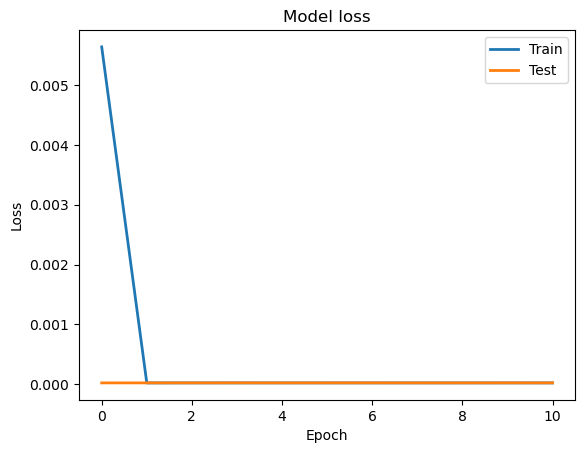

In [20]:
#Plot training and test loss

plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [21]:
"""Detect Anomalies on test data

Anomalies are data points where the reconstruction loss is higher

To calculate the reconstruction loss on test data, 
predict the test data and calculate the mean square error between the test data and the reconstructed test data."""
#the mean squared error (MSE) between the test data and the reconstructed test data. 
#This computes the reconstruction error for each data point in the test set.
test_x_predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_labels})
#creates a DataFrame containing the reconstruction error and the true class labels for each data point in the test set.

1781/1781 [==============================] - 3s 2ms/step


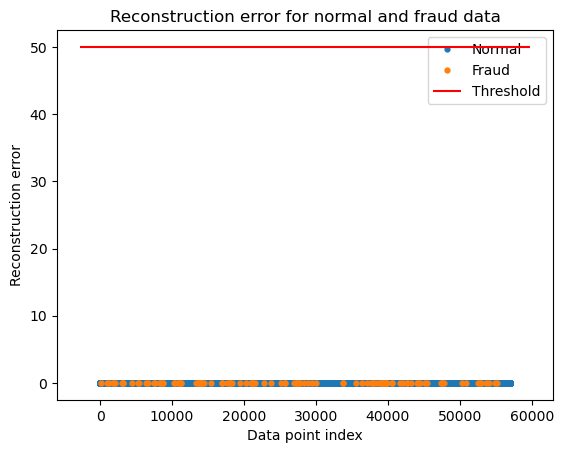

In [22]:
#Plotting the test data points and their respective reconstruction error sets a threshold value to visualize 
#if the threshold value needs to be adjusted.

threshold_fixed = 50
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

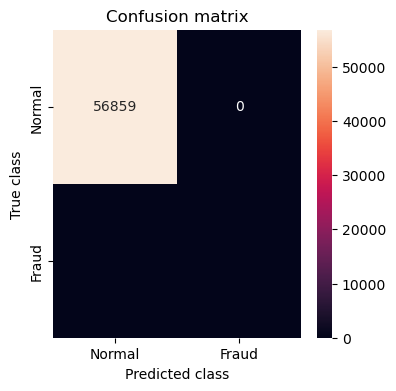

 Accuracy:  0.9981917769741231
 Recall:  0.0
 Precision:  0.0


C:\Users\Lenovo\Downloads\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
'''Detect anomalies as points where the reconstruction loss is greater than a fixed threshold. 
Here we see that a value of 52 for the threshold will be good.

Evaluating the performance of the anomaly detection'''
#1 if>52 else 0
threshold_fixed =52
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.True_class, pred_y)# true class labels (error_df.True_class) predicted labels (pred_y).
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# print Accuracy, precision and recall using fixed threshold
print(" Accuracy: ",accuracy_score(error_df['True_class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['True_class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['True_class'], error_df['pred']))

In [24]:
'''As our dataset is highly imbalanced, we see a high accuracy but a low recall and precision.

Things to further improve precision and recall would add more relevant features, 
different architecture for autoencoder, different hyperparameters, or a different algorithm.'''

'As our dataset is highly imbalanced, we see a high accuracy but a low recall and precision.\n\nThings to further improve precision and recall would add more relevant features, \ndifferent architecture for autoencoder, different hyperparameters, or a different algorithm.'

In [25]:
history

{'loss': [0.005640814546495676,
  1.93571177078411e-05,
  1.950802470673807e-05,
  1.966078889381606e-05,
  1.9620163584477268e-05,
  1.954660729097668e-05,
  1.9538856577128172e-05,
  1.954108665813692e-05,
  1.953278660948854e-05,
  1.9518645785865374e-05,
  1.9520677597029135e-05],
 'accuracy': [0.0566834919154644,
  0.07426491379737854,
  0.06088210642337799,
  0.0588245652616024,
  0.05728580430150032,
  0.06268025189638138,
  0.059668682515621185,
  0.05804639309644699,
  0.06170424073934555,
  0.0609656386077404,
  0.058314576745033264],
 'val_loss': [1.9981851437478326e-05,
  1.9970797438872978e-05,
  2.0113033315283246e-05,
  2.0455463527468964e-05,
  2.0098330423934385e-05,
  2.0286792278056964e-05,
  2.033369310083799e-05,
  2.0051600586157292e-05,
  2.006706563406624e-05,
  2.0291698092478327e-05,
  2.0207944544381462e-05],
 'val_accuracy': [0.005126224365085363,
  0.12785716354846954,
  0.055633578449487686,
  0.0010006671072915196,
  0.06607913970947266,
  0.2168463170528